In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# This is the library for the Reservoir Computing got it by: https://github.com/cknd/pyESN
from pyESN import ESN 
%matplotlib inline

Read your dataset from the file amazon.txt

In [21]:
# Read dataset amazon.txt
data = open("amazon.txt").read().split()
data = np.array(data).astype('float64')

In [28]:
len(data)

1800

In [74]:
n_reservoir= 500
sparsity=0.2
rand_seed=23
spectral_radius = 1.5
noise = .0001


esn = ESN(n_inputs = 1,
      n_outputs = 1, 
      n_reservoir = n_reservoir,
      sparsity=sparsity,
      random_state=rand_seed,
      spectral_radius = spectral_radius,
      noise=noise)

trainlen = 1500
future = 2
futureTotal=100
pred_tot=np.zeros(futureTotal)

for i in range(0,futureTotal,future):
    pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
    prediction = esn.predict(np.ones(future))
    pred_tot[i:i+future] = prediction[:,0]

In [127]:
future = 2
prediction = esn.predict(np.ones(future))
prediction[:,0]

array([677.92305222, 669.07597078])

Plot your prediction along with the ground truth (data) for the training and for the validation dataset

In [25]:
import seaborn as sns
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

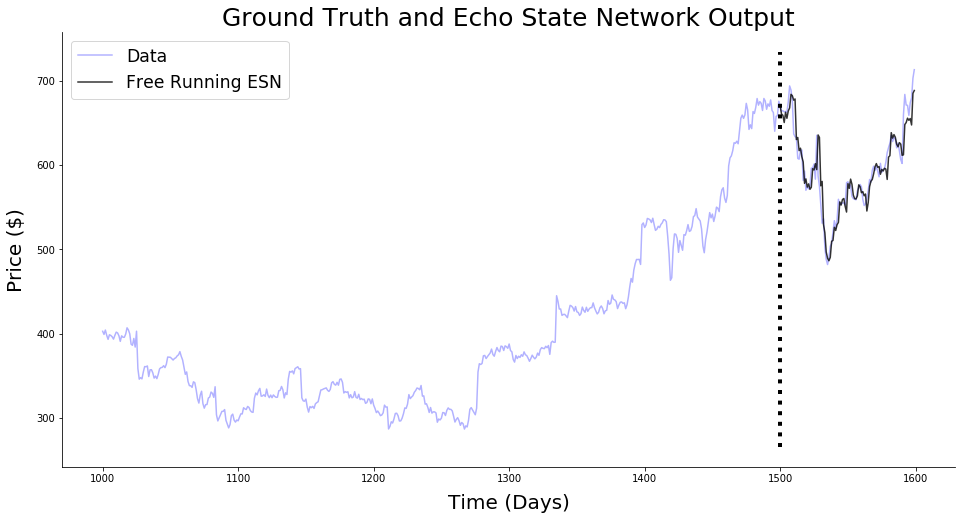

In [76]:
plt.figure(figsize=(16,8))
plt.plot(range(1000,trainlen+futureTotal),data[1000:trainlen+futureTotal],'b',label="Data", alpha=0.3)
#plt.plot(range(0,trainlen),pred_training,'.g',  alpha=0.3)
plt.plot(range(trainlen,trainlen+futureTotal),pred_tot,'k',  alpha=0.8, label='Free Running ESN')

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:', linewidth=4)

plt.title(r'Ground Truth and Echo State Network Output', fontsize=25)
plt.xlabel(r'Time (Days)', fontsize=20,labelpad=10)
plt.ylabel(r'Price ($)', fontsize=20,labelpad=10)
plt.legend(fontsize='xx-large', loc='best')
sns.despine()
plt.savefig('demo.png')

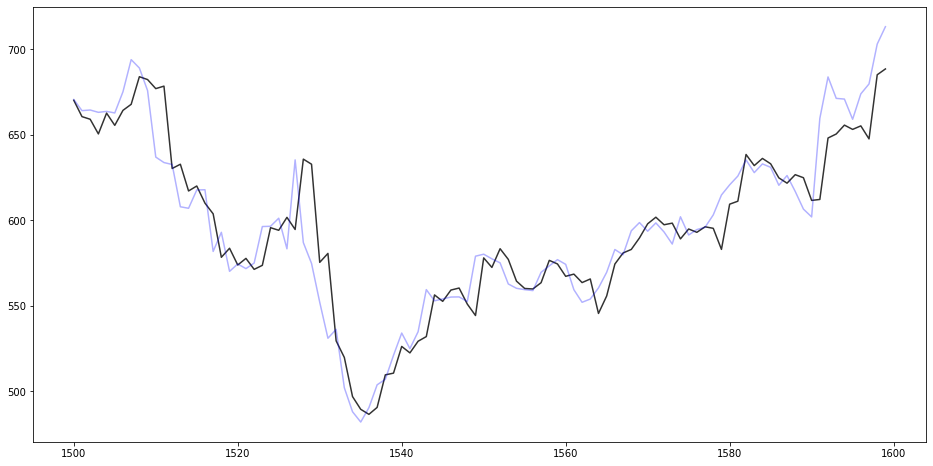

In [77]:
plt.figure(figsize=(16,8))

plt.plot(range(trainlen,trainlen+futureTotal),pred_tot,'k',  alpha=0.8, label='Free Running ESN')
# lo,hi = plt.ylim()
plt.plot(range(1500,trainlen+futureTotal),data[1500:trainlen+futureTotal],'b',label="Data", alpha=0.3)


Comment on the computational complexity of the training and evaluation of the RC. 

**Build a function for the MSE**

**Perform a grid search**

In [7]:
def MSE(yhat, y):
    return np.sqrt(np.mean((yhat.flatten() - y)**2))

In [20]:
n_reservoir= 500
sparsity   = 0.2
rand_seed  = 23
radius_set = [0.9,  1,  1.1]
noise_set = [ 0.001, 0.004, 0.006]

radius_set = [0.5, 0.7, 0.9,  1,  1.1,1.3,1.5]
noise_set = [ 0.0001, 0.0003,0.0007, 0.001, 0.003, 0.005, 0.007,0.01]



radius_set_size  = len(radius_set)
noise_set_size = len(noise_set)

trainlen = 1500
future = 2
futureTotal= 100

loss = np.zeros([radius_set_size, noise_set_size])

for l in range(radius_set_size):
    rho = radius_set[l]
    for j in range(noise_set_size):
        noise = noise_set[j]

        pred_tot=np.zeros(futureTotal)

        esn = ESN(n_inputs = 1,
          n_outputs = 1, 
          n_reservoir = n_reservoir,
          sparsity=sparsity,
          random_state=rand_seed,
          spectral_radius = rho,
          noise=noise)

        for i in range(0,futureTotal,future):
            pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
            prediction = esn.predict(np.ones(future))
            pred_tot[i:i+future] = prediction[:,0]
        
        loss[l, j] = MSE(pred_tot, data[trainlen:trainlen+futureTotal])        
        print('rho = ', radius_set[l], ', noise = ', noise_set[j], ', MSE = ', loss[l][j] )

rho =  0.5 , noise =  0.0001 , MSE =  20.367056802473908
rho =  0.5 , noise =  0.0003 , MSE =  22.449560080355674
rho =  0.5 , noise =  0.0007 , MSE =  24.574909979103406
rho =  0.5 , noise =  0.001 , MSE =  25.862558649039556
rho =  0.5 , noise =  0.003 , MSE =  29.882933676883706
rho =  0.5 , noise =  0.005 , MSE =  32.639426142897584
rho =  0.5 , noise =  0.007 , MSE =  36.44124554870499
rho =  0.5 , noise =  0.01 , MSE =  44.77637915284299
rho =  0.7 , noise =  0.0001 , MSE =  19.560517902135295
rho =  0.7 , noise =  0.0003 , MSE =  20.12742795027503
rho =  0.7 , noise =  0.0007 , MSE =  20.818014277378513
rho =  0.7 , noise =  0.001 , MSE =  21.261426199514933
rho =  0.7 , noise =  0.003 , MSE =  23.27088066080159
rho =  0.7 , noise =  0.005 , MSE =  26.061347331573593
rho =  0.7 , noise =  0.007 , MSE =  30.298361979418637
rho =  0.7 , noise =  0.01 , MSE =  39.17074955774518
rho =  0.9 , noise =  0.0001 , MSE =  18.612970860896926
rho =  0.9 , noise =  0.0003 , MSE =  18.6818158

Make a 2D plot to show the MSE for the different values of spectral_radius and noise

In [9]:
plt.figure(figsize=(16,8))
im = plt.imshow(loss.T, vmin=abs(loss).min(), vmax=abs(loss).max(), origin='lower',cmap='PuRd')
plt.xticks(np.linspace(0,radius_set_size-1,radius_set_size), radius_set);
plt.yticks(np.linspace(0,noise_set_size-1, noise_set_size), noise_set);
plt.xlabel(r'$\rho$', fontsize=16); plt.ylabel('noise', fontsize=16); 

# im.set_interpolation('bilinear')
cb = plt.colorbar(im); 

NameError: name 'loss' is not defined

<Figure size 1152x576 with 0 Axes>

What is the optimal set?

In [23]:
minLoss = np.min(loss)
index_min = np.where(loss == minLoss)
index_min
rho_opt = radius_set[int(index_min[0])]
noise_opt = noise_set[int(index_min[1])]
print('The optimal set is:\nspectrum radius = ',
      rho_opt,'\nnoise = ',noise_opt,'\nMSE = ',minLoss)


The optimal set is:
spectrum radius =  1.5 
noise =  0.0001 
MSE =  17.62740949011022


Explore the RC ability in long predictions

In [24]:
n_reservoir= 500
sparsity=0.2
rand_seed=23
spectral_radius = 1.1
noise = .0001

# let k_set be an array with the prediction-window values
k_set = [1,2,5,10]

k_size = len(k_set)
loss_k = np.zeros(k_size)

for l in range(k_size):
    future = k_set[l]

    trainlen = 1500    
    futureTotal=100
    
    pred_tot=np.zeros(futureTotal)

    esn = ESN(n_inputs = 1,
          n_outputs = 1, 
          n_reservoir = n_reservoir,
          sparsity=sparsity,
          random_state=rand_seed,
          spectral_radius = spectral_radius,
          noise=noise)


    for i in range(0,futureTotal,future):
        pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
        prediction = esn.predict(np.ones(future))
        pred_tot[i:i+future] = prediction[:,0]
        
    loss_k[l] = MSE(pred_tot, data[trainlen:trainlen+futureTotal])

Plot the MSE as a function of the prediction window

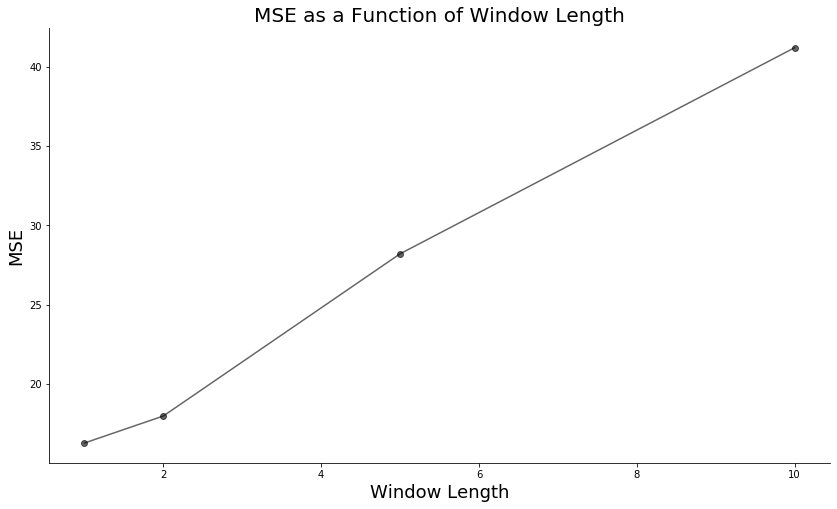

In [25]:
plt.figure(figsize=(14,8))
plt.plot(k_set, loss_k,'-ok', alpha=0.6)
plt.title('MSE as a Function of Window Length', fontsize=20)
plt.xlabel('Window Length', fontsize=18)
plt.ylabel('MSE', fontsize=18)
sns.despine()